In [8]:
# img_path = '/content/c.png'
img_path = '/content/b.jpeg'

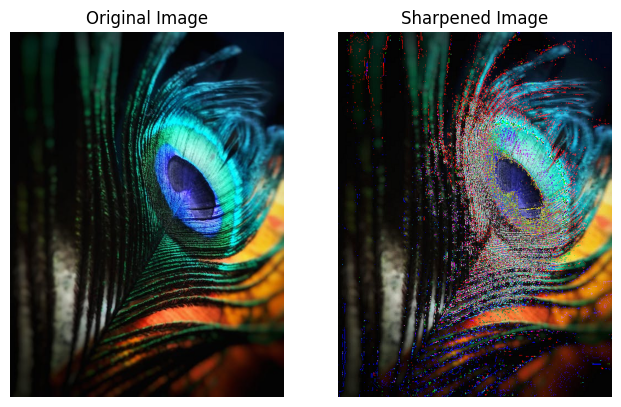

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import convolve

def sharpen_image(image, sharpening_factor):
    # Define a sharpening kernel
    kernel = np.array([[0, -sharpening_factor, 0],
                       [-sharpening_factor, 1 + 4 * sharpening_factor, -sharpening_factor],
                       [0, -sharpening_factor, 0]])

    # Apply the kernel separately to each channel
    sharpened_image = np.zeros_like(image)
    for i in range(image.shape[-1]):
        sharpened_image[..., i] = convolve(image[..., i], kernel)

    # Clip values to ensure they are within the valid pixel intensity range (0-255)
    sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

    return sharpened_image

# Load an example image
original_img = np.array(Image.open(img_path))

sharpening_factor = 0.5  # Adjust this value to control the sharpening level
sharpened_img = sharpen_image(original_img, sharpening_factor)

# Plotting the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sharpened_img)
plt.title('Sharpened Image')
plt.axis('off')


plt.show()
